In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

## Preamble

### Load data

In [2]:
mushrooms = pd.read_csv('data/mushrooms_train.csv')
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
mushrooms.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [4]:
print('Number of distinct values per variable:')
for c in mushrooms.columns:
    print('{:>25s}: {}'.format(c, mushrooms[c].nunique()))

Number of distinct values per variable:
                    class: 2
                cap-shape: 6
              cap-surface: 4
                cap-color: 10
                  bruises: 2
                     odor: 9
          gill-attachment: 2
             gill-spacing: 2
                gill-size: 2
               gill-color: 12
              stalk-shape: 2
               stalk-root: 5
 stalk-surface-above-ring: 4
 stalk-surface-below-ring: 4
   stalk-color-above-ring: 9
   stalk-color-below-ring: 9
                veil-type: 1
               veil-color: 4
              ring-number: 3
                ring-type: 5
        spore-print-color: 9
               population: 6
                  habitat: 7


### Transform data to numeric

In [5]:
predictors = mushrooms.columns[1:]

In [6]:
X = mushrooms[predictors].copy()
y = mushrooms['class'].copy()

for c in X.columns:
    X[c] = X[c].astype('category').cat.codes

y = y.astype('category').cat.codes

display(X.head())
display(y.head())

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


0    1
1    0
2    0
3    1
4    0
dtype: int8

In [7]:
test = pd.read_csv('data/mushrooms_test.csv')

X_test = test[predictors].copy()
y_test = test['class'].copy()

for c in X_test.columns:
    X_test[c] = X_test[c].astype('category').cat.codes

y_test = y_test.astype('category').cat.codes

display(X_test.head())
display(y_test.head())

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,0,4,1,5,1,0,0,7,1,...,2,7,3,0,2,1,4,2,5,0
1,2,0,8,0,5,1,1,0,2,0,...,1,7,7,0,2,2,4,7,2,1
2,4,0,3,0,2,1,0,0,3,0,...,1,4,0,0,2,1,2,1,4,4
3,2,0,8,0,5,1,1,0,7,0,...,1,7,7,0,2,2,4,7,3,1
4,1,1,2,1,5,1,0,0,10,0,...,2,2,2,0,2,2,0,7,1,6


0    0
1    0
2    1
3    0
4    0
dtype: int8

# Logistic regression

In [8]:
llm = LogisticRegression(max_iter=1000).fit(X, y)

In [9]:
display(llm.predict(X.head()))

display(llm.predict_proba(X.head()))

display(llm.score(X, y))

array([1, 0, 0, 1, 0], dtype=int8)

array([[1.87268336e-01, 8.12731664e-01],
       [8.14604592e-01, 1.85395408e-01],
       [9.27404170e-01, 7.25958300e-02],
       [1.72143895e-01, 8.27856105e-01],
       [9.99999230e-01, 7.69793164e-07]])

0.9527692307692308

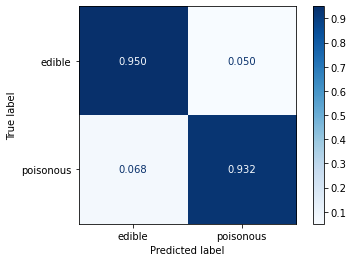

In [10]:
y_pred = llm.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred, normalize="true")

ConfusionMatrixDisplay(conf_mat, display_labels=["edible", "poisonous"]).plot(
    cmap=plt.cm.Blues, values_format='.3f')

### Vary thresholds

[0.05029940119760479,
 0.06347305389221557,
 0.1724550898203593,
 0.36047904191616764,
 0.7005988023952096,
 0.8491017964071856]

[0.06844106463878327,
 0.034220532319391636,
 0.005069708491761723,
 0.0012674271229404308,
 0.0,
 0.0]

[0.9408866995073891,
 0.9507389162561576,
 0.9088669950738916,
 0.8140394088669951,
 0.6397783251231527,
 0.5634236453201971]

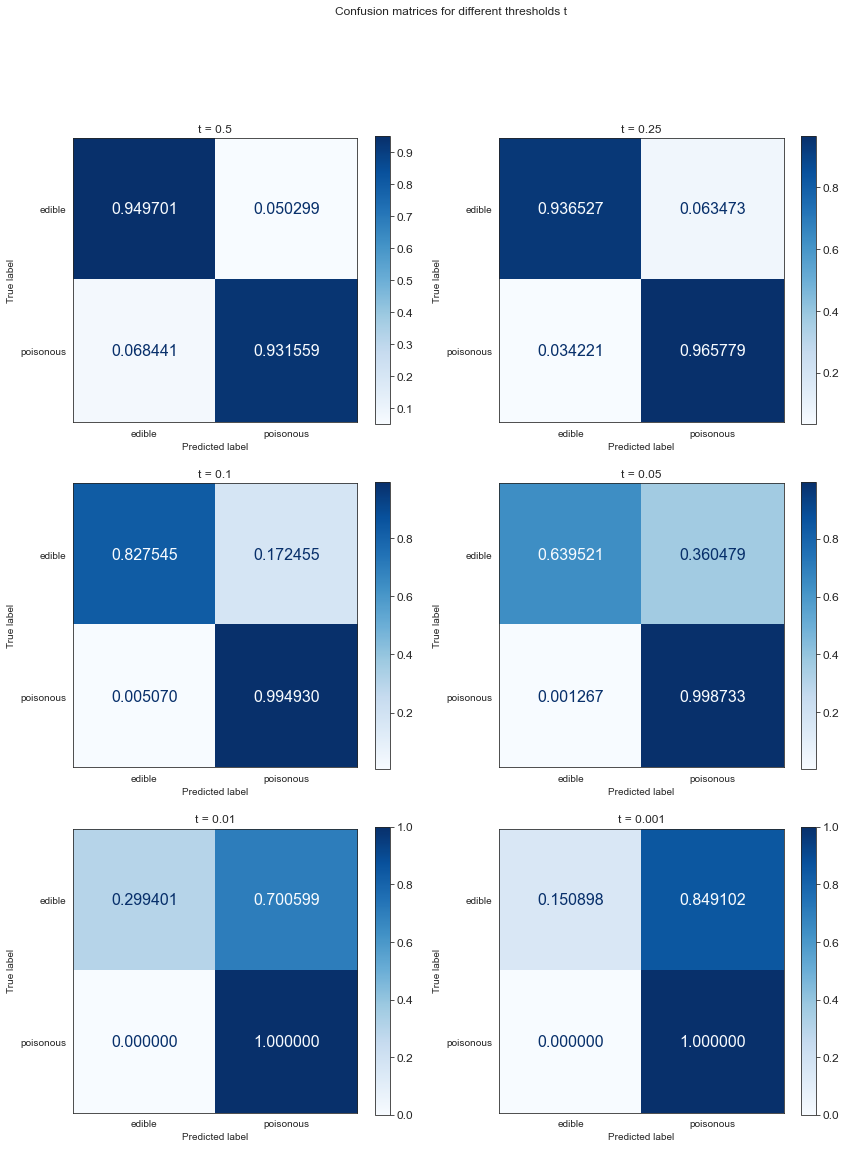

In [11]:
thresholds = [0.5, 0.25, 0.1, 0.05, 0.01, 0.001]

with sns.axes_style("white"):

    fig, axs = plt.subplots(3, 2, figsize=(14,18))
    axs = axs.flatten()
    fig.suptitle('Confusion matrices for different thresholds t')
    plt.rcParams.update({'font.size': 12})
    
    fp = []
    fn = []
    acc = []

    for i, t in enumerate(thresholds):
        y_pred = llm.predict_proba(X_test)[:, 1] >= t
        conf_mat = confusion_matrix(y_test, y_pred, normalize="true")
        cmd = ConfusionMatrixDisplay(conf_mat, display_labels=["edible", "poisonous"])
        cmd.plot(cmap=plt.cm.Blues, values_format='.6f', ax=axs[i])
        
        fp.append(conf_mat[0,1])
        fn.append(conf_mat[1,0])
        acc.append(accuracy_score(y_test, y_pred))
        
        for labels in cmd.text_.ravel():
            labels.set_fontsize(16)
        axs[i].title.set_text('t = {}'.format(t))
    
    display(fp)
    display(fn)
    display(acc)
    plt.show()

### Penalized model fitting

[0.05029940119760479,
 0.05029940119760479,
 0.059880239520958084,
 0.09101796407185629,
 0.12095808383233533,
 0.14011976047904193]

[0.06844106463878327,
 0.048162230671736375,
 0.008871989860583017,
 0.0012674271229404308,
 0.0,
 0.0]

[0.9408866995073891,
 0.9507389162561576,
 0.9649014778325123,
 0.9525862068965517,
 0.937807881773399,
 0.9279556650246306]

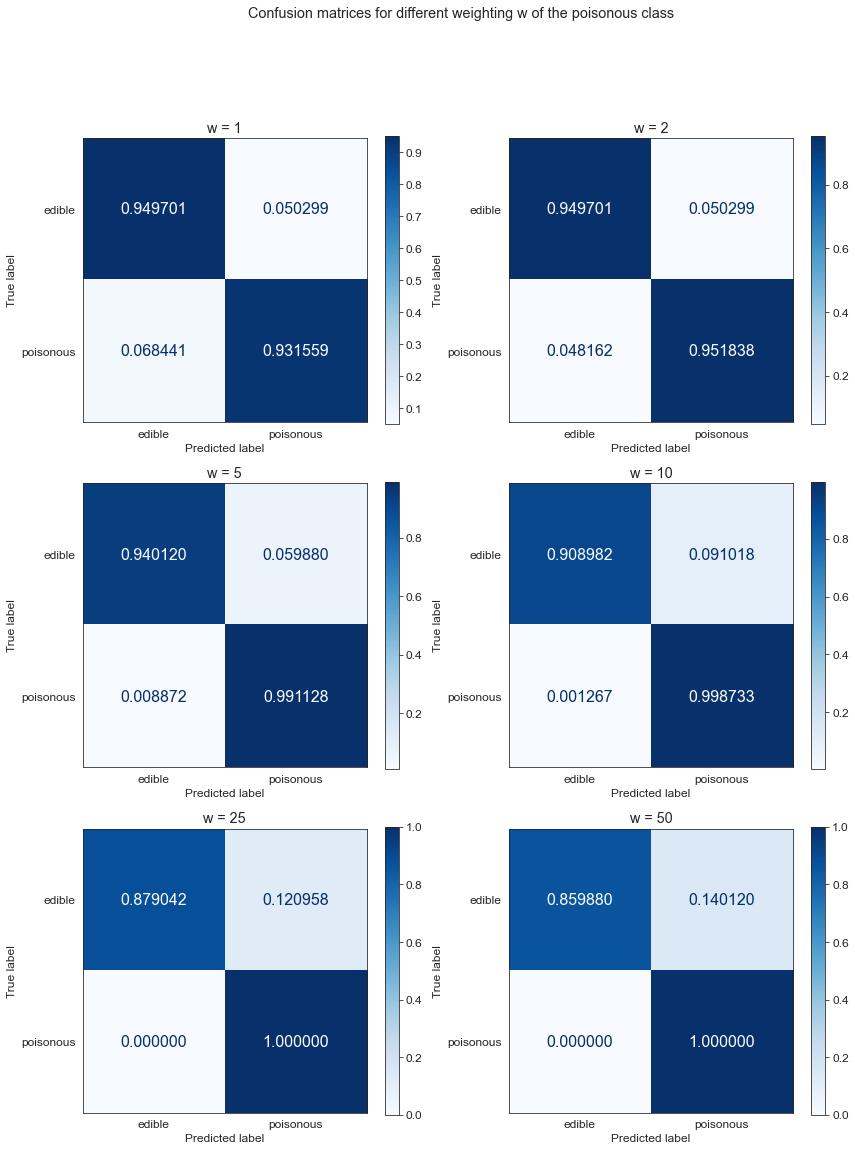

In [12]:
weights = [1, 2, 5, 10, 25, 50]

with sns.axes_style("white"):
    
    fig, axs = plt.subplots(3, 2, figsize=(14,18))
    axs = axs.flatten()
    fig.suptitle('Confusion matrices for different relative weighting w of the poisonous class')
    plt.rcParams.update({'font.size': 12})
    
    fp = []
    fn = []
    acc = []
    
    for i, w in enumerate(weights):
        llm = LogisticRegression(max_iter=1000, class_weight={0: 1, 1:w}).fit(X, y)

        y_pred = llm.predict(X_test)
        conf_mat = confusion_matrix(y_test, y_pred, normalize="true")
        cmd = ConfusionMatrixDisplay(conf_mat, display_labels=["edible", "poisonous"])
        cmd.plot(cmap=plt.cm.Blues, values_format='.6f', ax=axs[i])
        
        fp.append(conf_mat[0,1])
        fn.append(conf_mat[1,0])
        acc.append(accuracy_score(y_test, y_pred))
        
        
        for labels in cmd.text_.ravel():
            labels.set_fontsize(16)
        axs[i].title.set_text('w = {}'.format(w))
    
    display(fp)
    display(fn)
    display(acc)
    plt.show()